**Traitement d'images**

In [93]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

Load the image and properties

In [94]:
img=cv2.imread("Cat03.jpg")
print(img.shape)
print(img.size)

(1598, 1600, 3)
7670400


Display the image

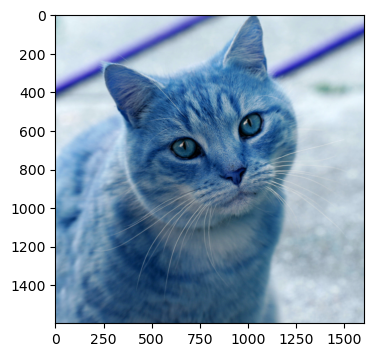

In [95]:


plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()


Display a pixel and a zone

In [96]:
px = img[100,100]
px
px_canal=img.item(100,100,2)
zone=img[100:110,100:110]
zone

array([[[219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242]],

       [[219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242],
        [220, 236, 242]],

       [[219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241]],

       [[219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 241],
        [219, 235, 

Problème de couleur de l'image  
car matplotlib utilise le format RGB alors qu'OpenCV utilise par défaut un format BGR  
--> décalage des colonnes

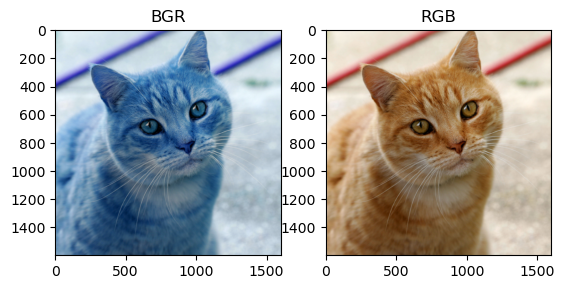

In [97]:
img_rgb=img[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("BGR")
plt.subplot(1,2,2)
plt.imshow(img_rgb)
plt.title("RGB")
plt.show()
# save again in BGR format :
image_cat=cv2.imwrite("img_rgb.jpg",img_rgb)

Histogramme

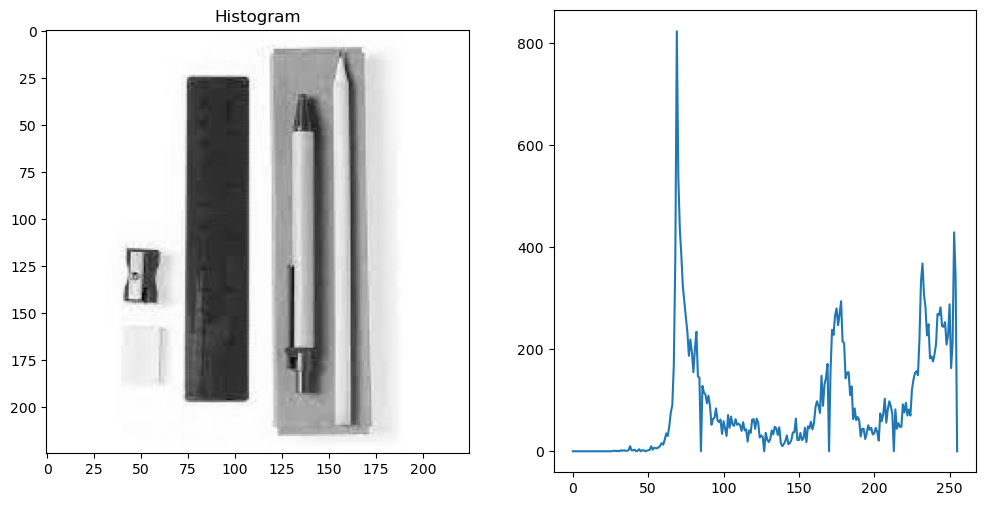

In [127]:
from cv2 import COLOR_BGR2GRAY
from matplotlib.pyplot import gray

# Test with images : bureau.jpg and gomme.jpg
img=cv2.imread("bureau.jpg")    # other image : gomme.jpg
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # gray levels
hist = cv2.calcHist([img_gray],[0],None,[256],[0,250])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap='gray')
plt.title("Histogram")
plt.subplot(1,2,2)
plt.plot(hist)
plt.show()

Threshold function

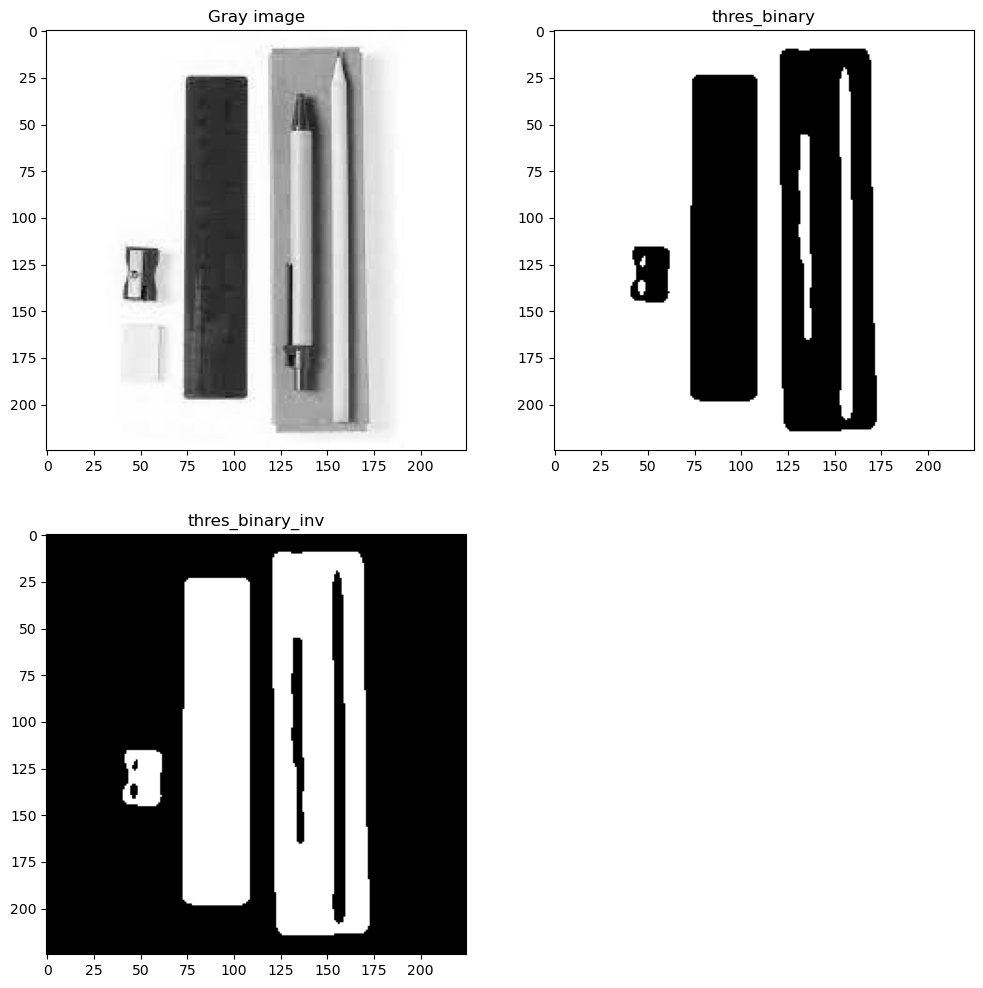

In [129]:
from cv2 import GaussianBlur

# Test : Modify the size of GaussianBlur filter (11,11)
blur=cv2.GaussianBlur(img_gray,(11,11),0) # convolution filter to add blur
(ret1,img_gray1)=cv2.threshold(blur,200,255,cv2.THRESH_BINARY) # threshold
(ret2,img_gray2)=cv2.threshold(blur,200,255,cv2.THRESH_BINARY_INV) # threshold

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_gray,cmap='gray')
plt.title("Gray image")

plt.subplot(2,2,2)
plt.imshow(img_gray1,cmap='gray')
plt.title("thres_binary")

plt.subplot(2,2,3)
plt.imshow(img_gray2,cmap='gray')
plt.title("thres_binary_inv")

plt.show()

**Détection de contours**  
Fonctions disponibles avec OpenCV :  
cv2.Sobel(), cv2.Canny(), cv2.findContour(), etc.
Here, we use : cv2.Canny()  
Tuto : https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html 

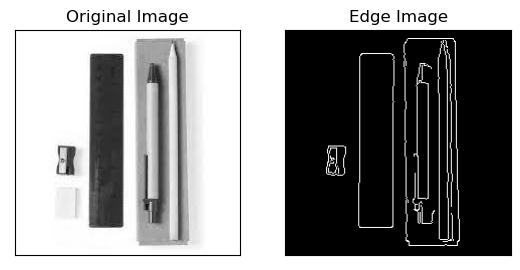

In [136]:
img = cv2.imread('bureau.jpg',0)
edges = cv2.Canny(img,150,255)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
